In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [3]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


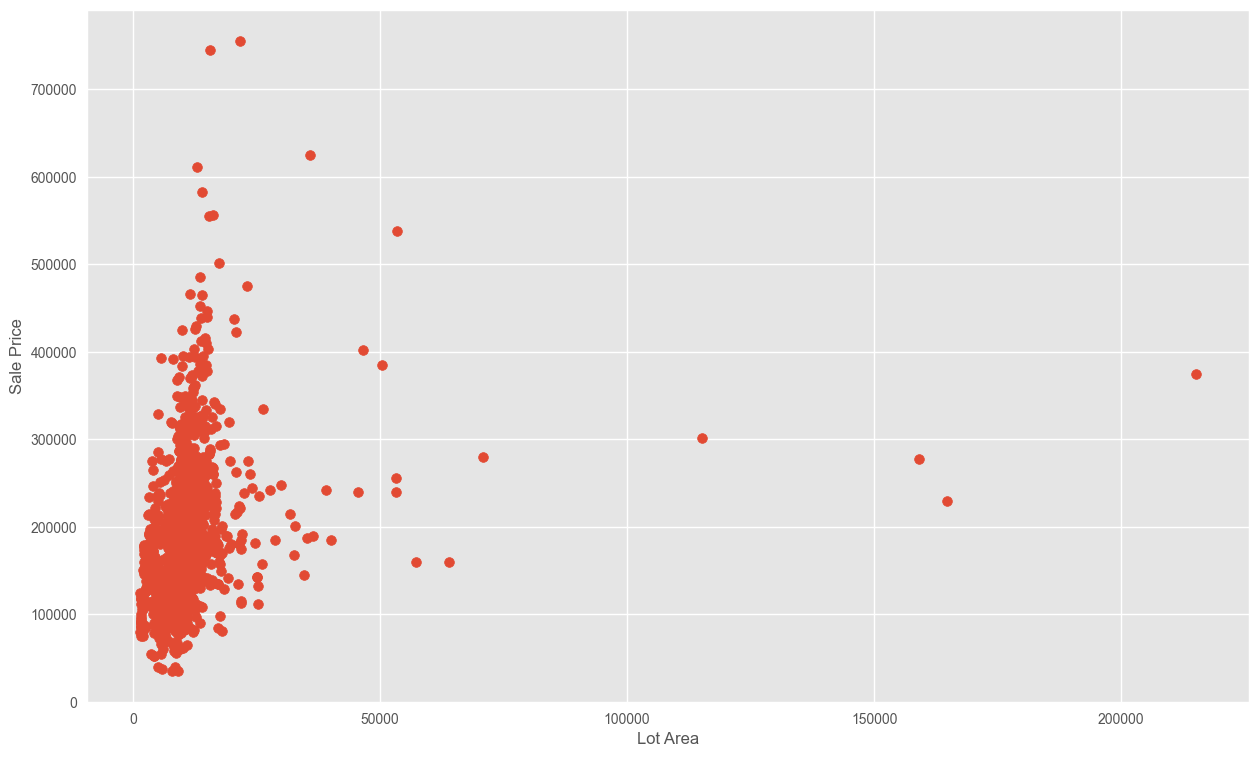

In [25]:
#exploratory data analysis
houses_df.describe()



plt.scatter(houses_df['LotArea'], houses_df['SalePrice'])
plt.xlabel('Lot Area (ft^2)')
plt.ylabel('Sale Price ($)')
plt.show()



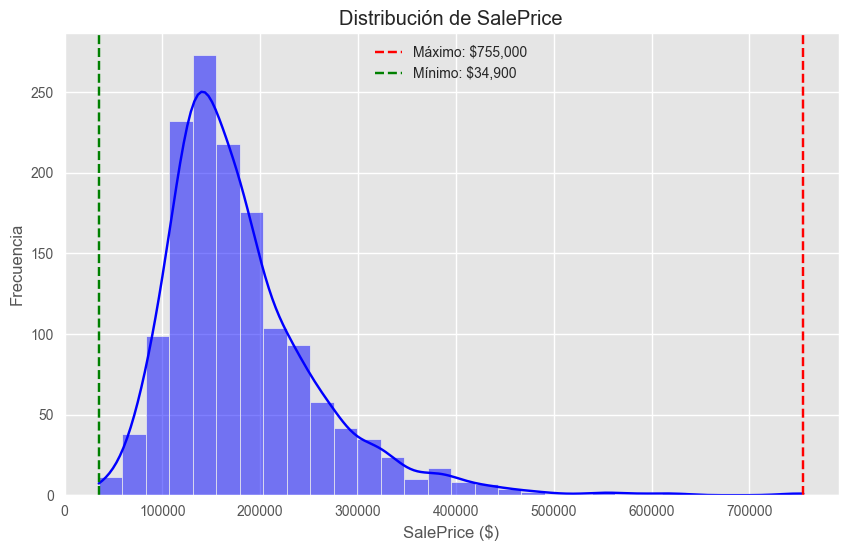

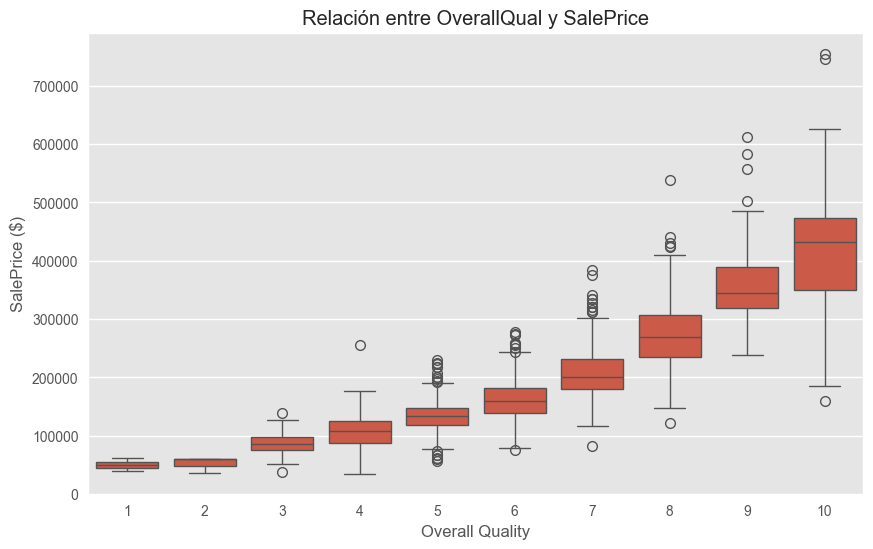

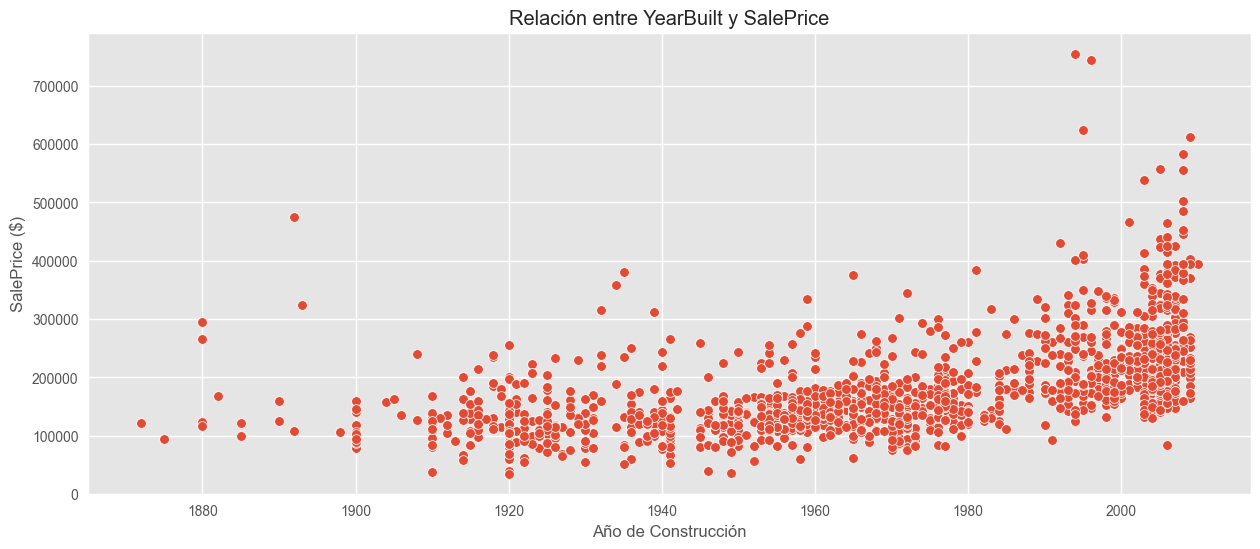

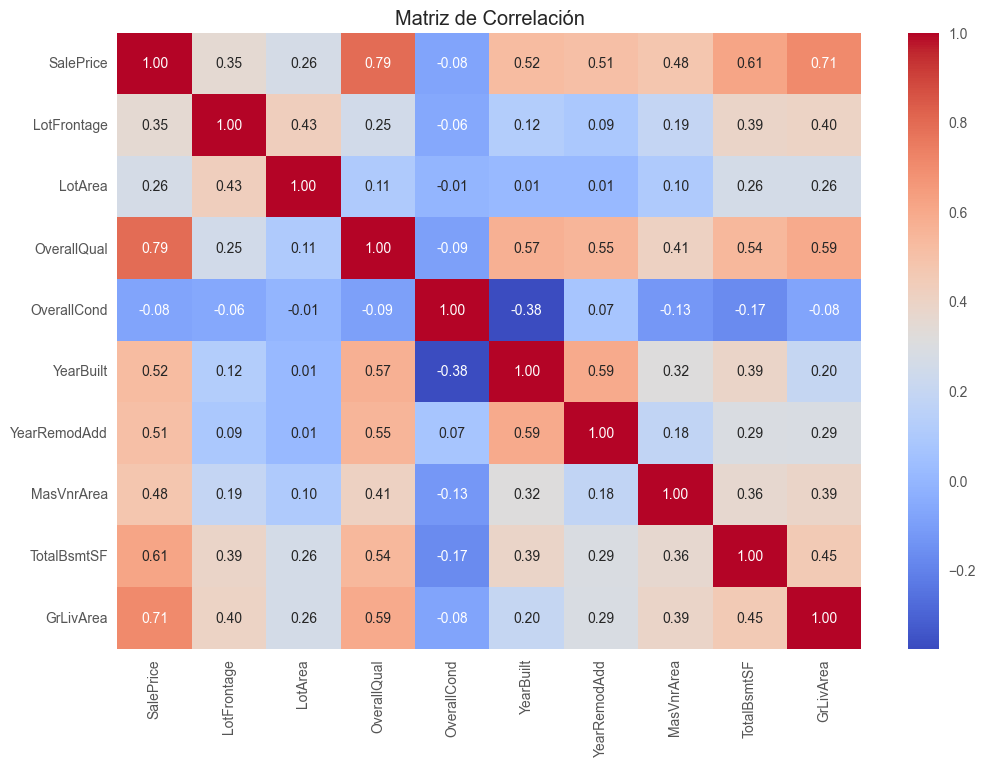

In [10]:
# Calcular el máximo y mínimo de SalePrice
max_sale_price = selected_df['SalePrice'].max()
min_sale_price = selected_df['SalePrice'].min()

# Graficar la distribución de la variable 'SalePrice' con líneas para el máximo y el mínimo
plt.figure(figsize=(10,6))
sns.histplot(selected_df['SalePrice'], kde=True, bins=30, color='blue')
plt.axvline(x=max_sale_price, color='red', linestyle='--', label=f'Máximo: ${max_sale_price:,}')
plt.axvline(x=min_sale_price, color='green', linestyle='--', label=f'Mínimo: ${min_sale_price:,}')
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


# Graficar la relación entre 'OverallQual' y 'SalePrice'
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=selected_df)
plt.title('Relación entre OverallQual y SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice ($)')
plt.show()

# Graficar la relación entre 'YearBuilt' y 'SalePrice'
plt.figure(figsize=(15,6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=selected_df)
plt.title('Relación entre YearBuilt y SalePrice')
plt.xlabel('Año de Construcción')
plt.ylabel('SalePrice ($)')
plt.show()

# Graficar la matriz de correlación entre todas las variables
correlation_matrix = selected_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

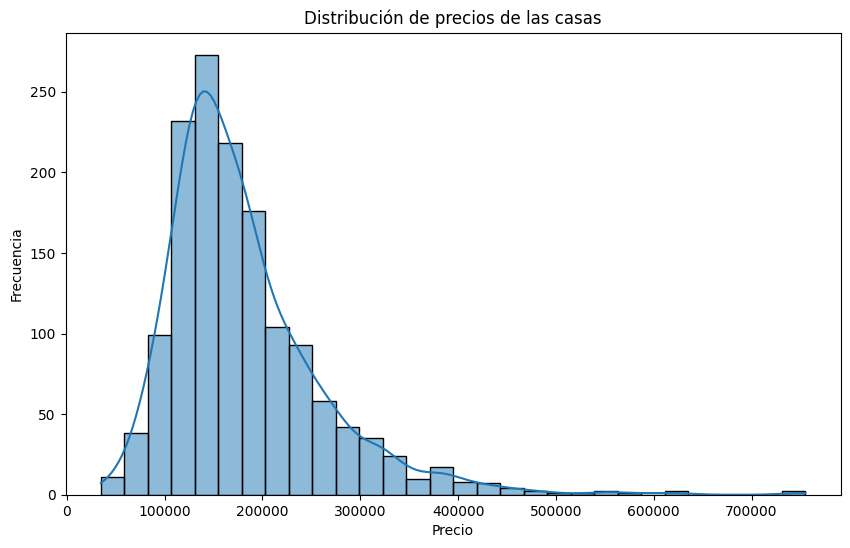

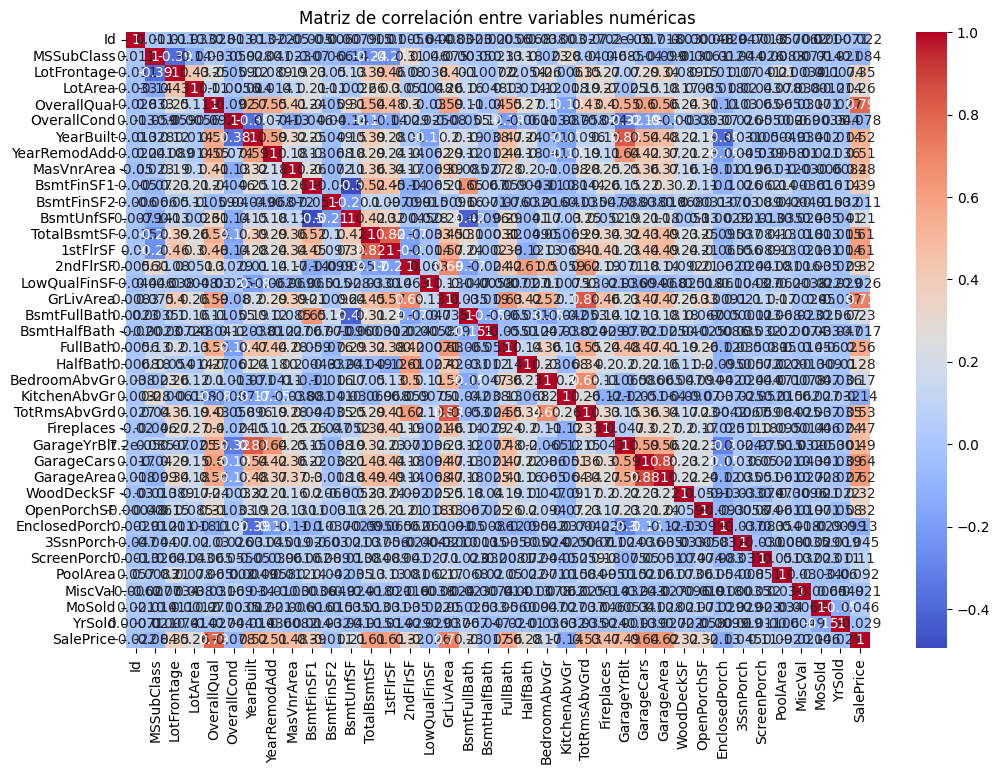

MSE (Multivariate Linear Regression): 1467730498.517872
R2 Score (Multivariate Linear Regression): 0.8086482297007651


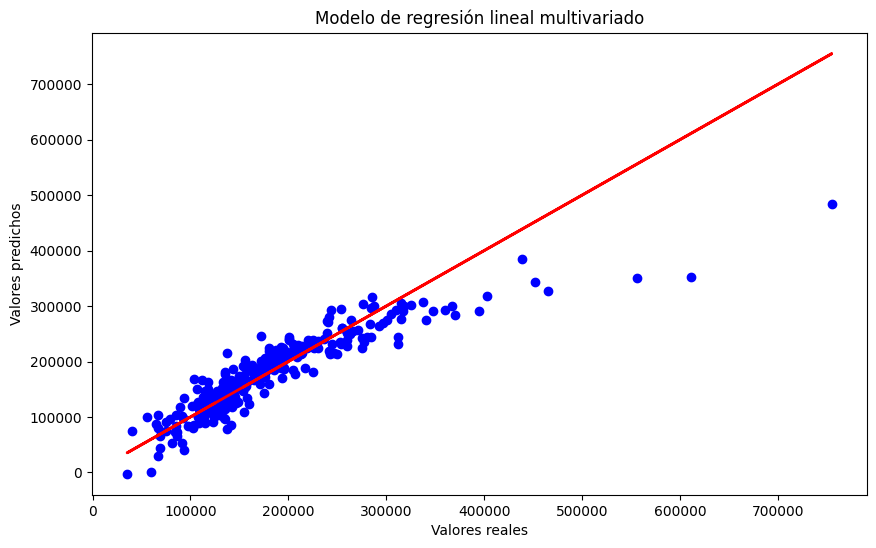

                 SalePrice                                LotArea           \
                      mean    median            std          mean   median   
OverallQual                                                                  
1             50150.000000   50150.0   15344.217152   7510.000000   7510.0   
2             51770.333333   60000.0   14254.200796   7840.000000   8400.0   
3             87473.750000   86250.0   24688.567399   8358.550000   8359.0   
4            108420.655172  108000.0   29022.003886   8917.982759   8487.5   
5            133523.347607  133000.0   27107.330927  10153.352645   8892.0   
6            161603.034759  160000.0   36090.182933  10026.649733   9327.0   
7            207716.423197  200141.0   44466.259414  11075.799373   9600.0   
8            274735.535714  269750.0   63898.902253  11103.839286  10748.5   
9            367513.023256  345000.0   81278.174849  13424.186047  12919.0   
10           438588.388889  432390.0  159785.491058  19869.94444

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos
houses_df = pd.read_csv('train.csv', encoding='latin1')

# Exploración inicial de los datos
print(houses_df.head())
print(houses_df.info())
print(houses_df.describe())

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(houses_df['SalePrice'], kde=True, bins=30)
plt.title('Distribución de precios de las casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de correlación entre variables numéricas
numeric_features = houses_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# División del conjunto de datos en entrenamiento y prueba
X = houses_df[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
               'MasVnrArea', 'TotalBsmtSF', 'GrLivArea']]
y = houses_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manejo de valores faltantes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Modelo de regresión lineal multivariado
multi_linear_reg = LinearRegression()
multi_linear_reg.fit(X_train_imputed, y_train)
multi_y_pred = multi_linear_reg.predict(X_test_imputed)

# Evaluación del modelo multivariado
print('MSE (Multivariate Linear Regression):', mean_squared_error(y_test, multi_y_pred))
print('R2 Score (Multivariate Linear Regression):', r2_score(y_test, multi_y_pred))

# Visualización del modelo multivariado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, multi_y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Modelo de regresión lineal multivariado')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

#Pregunta 3
# Agrupación por calidad general y análisis de las características de cada grupo
grouped_data = houses_df.groupby('OverallQual').agg({
    'SalePrice': ['mean', 'median', 'std'],
    'LotArea': ['mean', 'median', 'std'],
    'YearBuilt': ['min', 'max']
})

print(grouped_data)



In [19]:
#Pregunta 4 
from sklearn.model_selection import train_test_split

#Para la pregunta 6
# Fijar la semilla aleatoria para reproducibilidad
random_seed = 42

# División del conjunto de datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Información sobre los tamaños de los conjuntos
print("Número de filas en el conjunto de entrenamiento:", X_train.shape[0])
print("Número de filas en el conjunto de prueba:", X_test.shape[0])


Número de filas en el conjunto de entrenamiento: 1168
Número de filas en el conjunto de prueba: 292


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          1.08e-169
Time:                        10:45:13   Log-Likelihood:                -14416.
No. Observations:                1168   AIC:                         2.884e+04
Df Residuals:                    1166   BIC:                         2.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.49e+04   5005.211      4.975      0.0

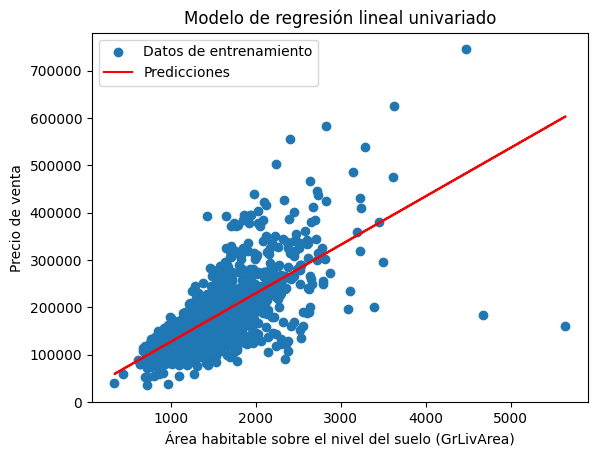

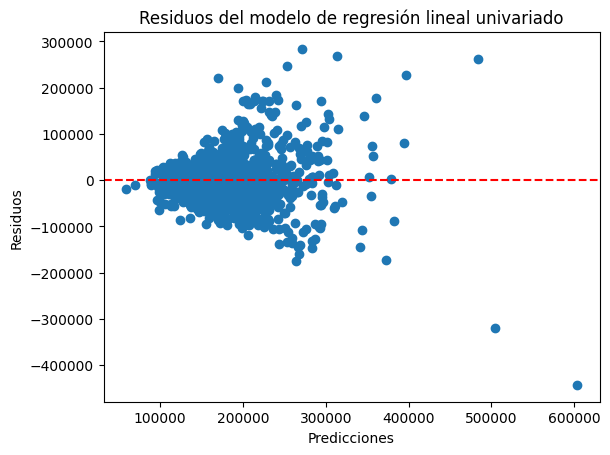

In [20]:
#Pregunta 7
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Agregar una columna de unos para el término constante
X_train_uni = sm.add_constant(X_train['GrLivArea'])

# Crear el modelo de regresión lineal univariado
model_uni = sm.OLS(y_train, X_train_uni)

# Ajustar el modelo
results_uni = model_uni.fit()

# Resumen del modelo
print(results_uni.summary())

# Obtener los residuos
residuals_uni = results_uni.resid

# Predicciones sobre los datos de entrenamiento
predictions_uni = results_uni.predict(X_train_uni)

# Gráfico de dispersión de los datos de entrenamiento y las predicciones
plt.scatter(X_train['GrLivArea'], y_train, label='Datos de entrenamiento')
plt.plot(X_train['GrLivArea'], predictions_uni, color='red', label='Predicciones')
plt.xlabel('Área habitable sobre el nivel del suelo (GrLivArea)')
plt.ylabel('Precio de venta')
plt.title('Modelo de regresión lineal univariado')
plt.legend()
plt.show()

# Gráfico de los residuos
plt.scatter(predictions_uni, residuals_uni)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos del modelo de regresión lineal univariado')
plt.show()



In [118]:
selectedVars = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
numericas = houses_df[selectedVars]
numericas

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,8,2003.0,2,548,208500
1,6,1976,1976,1262,1262,1262,6,1976.0,2,460,181500
2,7,2001,2002,920,920,1786,6,2001.0,2,608,223500
3,7,1915,1970,756,961,1717,7,1998.0,3,642,140000
4,8,2000,2000,1145,1145,2198,9,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,7,1999.0,2,460,175000
1456,6,1978,1988,1542,2073,2073,7,1978.0,2,500,210000
1457,7,1941,2006,1152,1188,2340,9,1941.0,1,252,266500
1458,5,1950,1996,1078,1078,1078,5,1950.0,1,240,142125


In [119]:

null_counts = numericas.isnull().sum()
null_counts

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [120]:
# numericas["MasVnrArea"].fillna(numericas["MasVnrArea"].median(numeric_only=True),inplace=True)
numericas["GarageYrBlt"].fillna(numericas["GarageYrBlt"].median(numeric_only=True),inplace=True)


/var/folders/nh/qxcg2qs54dq8v4tnbxqzpm7w0000gn/T/ipykernel_9262/437080969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas["GarageYrBlt"].fillna(numericas["GarageYrBlt"].median(numeric_only=True),inplace=True)


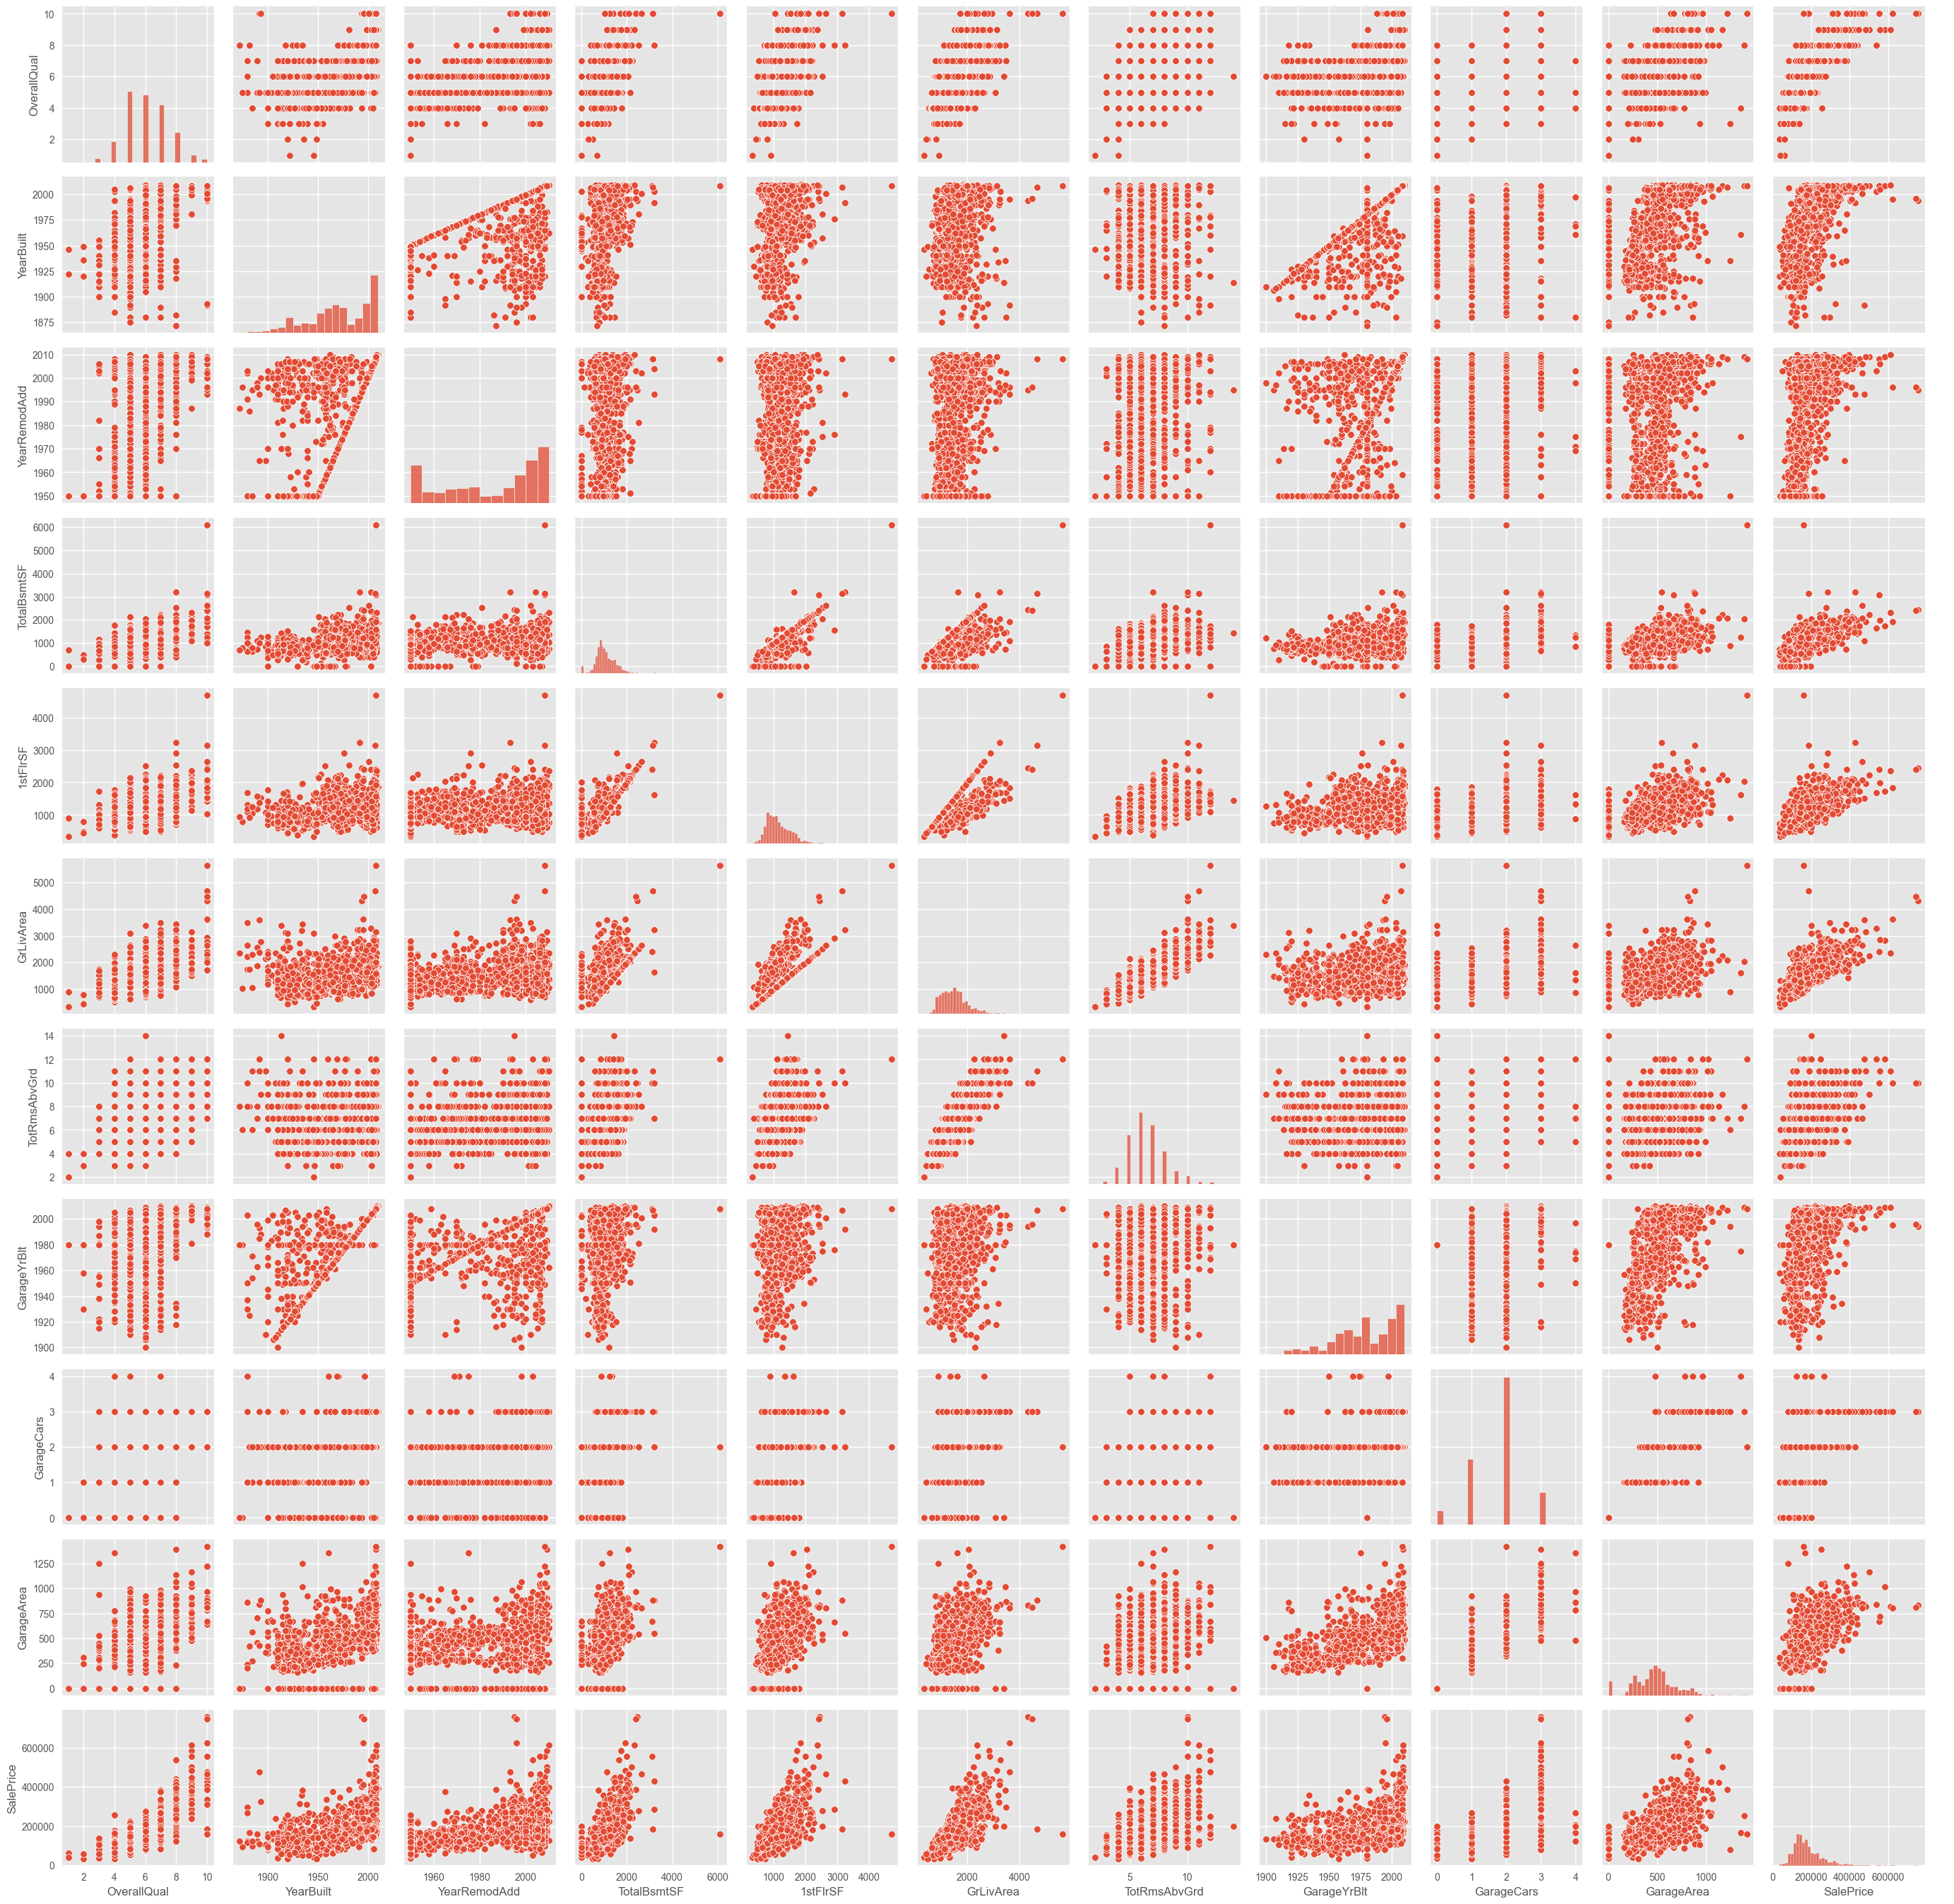

In [121]:
g = sns.PairGrid(numericas)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [122]:
y = numericas.pop("SalePrice") #La variable respuesta
X = numericas #El resto de los datos

In [123]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 10)
(438, 10)
(1021,)
(438,)


In [124]:
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)
y_pred_modelo1 = modelo1.predict(X_test)

In [125]:
len(modelo1.get_params())
y_pred_modelo1

array([119329.75301975, 167478.660911  , 221643.45237278, 231676.13431189,
       143915.7303345 , 126794.69833477, 258589.67182887, 104098.91654093,
        83086.48374752, 241498.75484366, 222903.96836185, 123875.07541363,
       118481.54717145, 276060.02679057, 194904.49071856, 207121.10735159,
       220494.37458809, 208395.82795155, 293169.22585517, 146210.92019198,
       141403.22719211, 113101.46542454, 148784.16503378,  48690.60360921,
       209869.93667271, 179517.46129975, 141512.00973631, 120724.09851926,
       130205.32007519, 289966.64398063, 688459.05797911, 134564.75391606,
       225243.77473051, 157661.12078161, 156574.5062121 , 309683.85240134,
        71018.45282933, 304559.49513805, 221959.3950453 , 468575.14249176,
       192214.67660761, 110298.37498549, 103735.83429656, 226541.32252966,
       207088.6161415 , 121887.34086157, 269073.60366028, 256301.74456197,
        91611.17514793, 308192.25697086, 202347.84218828,  67163.68231779,
       132942.05319082, 2

In [126]:
sm.OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              3220.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:29:50   Log-Likelihood:                         -12093.
No. Observations:                1021   AIC:                                  2.421e+04
Df Residuals:                    1011   BIC:                                  2.426e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   2.246e+04   1181.433     19.013      0.000    2.01e+04    2.48e+04
YearBuilt      177.6469     63.460      2.799      0.005      53.118     302.176
YearRemodAdd     1.5772     57.120      0.028      0.978    -110.510     113.665
TotalBsmtSF     32.6056      4.473      7.289      0.000      23.828      41.384
1stFlrSF         6.2058      5.180      1.198      0.231      -3.958      16.370
GrLivArea       45.8339      4.582     10.003      0.000      36.842      54.826
TotRmsAbvGrd -1270.3450   1200.504     -1.058      0.290   -3626.110    1085.420
GarageYrBlt   -224.0482     73.613     -3.044      0.002    -368.499     -79.597
GarageCars    4667.1080   3254.277      1.434      0.152   -1718.802    1.11e+04
GarageArea      46.2315     11.219      4.121      0.000      24.216      68.247
==============================================================================
Omnibus:                      220.692   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7290.953
Skew:                          -0.092   Prob(JB):                         0.00
Kurtosis:                      16.090   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# calculate aic for regression 
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic

In [128]:
explained_variance_modelo1=metrics.explained_variance_score(y_test, y_pred_modelo1)
mean_absolute_error_modelo1=metrics.mean_absolute_error(y_test, y_pred_modelo1) 
mse_modelo1=metrics.mean_squared_error(y_test, y_pred_modelo1) 
mean_squared_log_error_modelo1=metrics.mean_squared_log_error(y_test, y_pred_modelo1)
median_absolute_error_modelo1=metrics.median_absolute_error(y_test, y_pred_modelo1)
r2_modelo1=metrics.r2_score(y_test, y_pred_modelo1)
k = modelo1.coef_.size
n = X_train.shape[0]
aic_modelo1 = calculate_aic(n,mse_modelo1,k)
bic_modelo1 = calculate_bic(n,mse_modelo1,k)

print('explained_variance: ', round(explained_variance_modelo1,4))   
print('mean_squared_log_error: ', round(mean_squared_log_error_modelo1,4))
print('r2: ', round(r2_modelo1,4))
print('MAE: ', round(mean_absolute_error_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))
print('AIC: ',round(aic_modelo1,4))
print('BIC: ',round(bic_modelo1,4))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.